In [6]:
def plot_figures(train_graphs, lr):
    cur_epochs = train_graphs.log_epochs
    plt.figure(figsize=(15,5))

    plt.subplot(2,5,2)
    plt.semilogy(cur_epochs, train_graphs.loss)
    #plt.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Loss')

    plt.subplot(2,5,3)
    plt.plot(cur_epochs, train_graphs.accuracy)
    #.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Accuracy')

    plt.subplot(2,5,4)
    plt.semilogy(cur_epochs, train_graphs.wn_grad_loss_ratio)
    #plt.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Grad Loss Ratio')

    plt.subplot(2,5,5)
    plt.plot(cur_epochs, train_graphs.wn_norm_min)
    #.legend(['Loss + Weight Decay'])
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Min Norm')

    plt.tight_layout()
    plt.show()

def plot_figures_widths(widths, model_params):
    plt.figure(figsize=(15,5))
    for width in widths:
        model_param = model_params[width]
        directory = get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **model_param)

        with open(f'../{directory}train_graphs.pk', 'rb') as f:
            train_graphs = pickle.load(f)

        cur_epochs = train_graphs.log_epochs
        print(cur_epochs)
        plt.subplot(2,5,1)
        plt.semilogy(cur_epochs, train_graphs.loss)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Loss')

        plt.subplot(2,5,2)
        plt.plot(cur_epochs, train_graphs.accuracy)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Training Accuracy')

        plt.subplot(2,5,3)
        print(train_graphs.wn_grad_loss_ratio)
        plt.semilogy(cur_epochs, train_graphs.wn_grad_loss_ratio)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Grad Loss Ratio')

        plt.subplot(2,5,4)
        plt.semilogy(cur_epochs, train_graphs.wn_norm_min_with_g)
        #plt.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Min Norm with G')

        plt.subplot(2,5,5)
        plt.plot(cur_epochs, train_graphs.wn_norm_min)
        #.legend(['Loss + Weight Decay'])
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.title('Min Norm')

    plt.legend(widths)
    plt.tight_layout()
    plt.show()



In [1]:
import sys
sys.path.append('..')
from main import graphs
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np

loss_name = 'MSELoss'

def get_lookup_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, **kwargs):
    results_dir = "results"
    directory = f"{results_dir}/{dataset_name}/{opt_name}/{model_name}/"
    for key, value in kwargs.items():
        directory += f"{key}_{value}/"
    directory += f"lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/"
    return directory

def get_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, epochs, **kwargs):
    #results_dir = "results"
    #directory = f"{results_dir}/{model_name}/{dataset_name}/{opt_name}/lr_{lr}/wd_{weight_decay}/batch_size_{batch_size}/epoch_{epochs}/"
    directory = get_lookup_directory(lr, dataset_name, opt_name, model_name, weight_decay, batch_size, **kwargs) + f"epoch_{epochs}/"
    print(directory)
    return directory

In [ ]:
! python main.py --dataset cifar --model weight_norm --loss MSELoss --opt sgd --lr 0.0001 --epoch 4000 --analysis loss weight_norm --batch_size 512 --width 4096 --init_mode "O(1/sqrt{m})" --basis_var 0.02 --wn_scale 1 --momentum 0.9

results/cifar/sgd/weight_norm/width_2048/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0001/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201]
[1682.65576171875, 19002.578125, 49970.61328125, 71876.4609375, 64842.078125, 69520.5625, 258715.71875, 304136.25, 132359.34375, 100266.8125, 182279.203125, 194554.4375, 161503.171875, 333571.34375, 174630.171875, 284270.46875, 162422.328125]
results/cifar/sgd/weight_norm/width_4096/init_O(1/sqrt{m})/var_0.02/scale_1.0/lr_0.0001/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
[64357.81640625, 5706.724609375, 17562.453125, 62830.35546875, 86086.2734375, 233064.109375, 112500.0859375, 120173.5625, 138064.84375, 147582.71875, 209517.71875, 222205.328125, 253272.796875, 295763.875, 353263.03125, 327146.78125, 141549.765625, 482145.0625, 279540.78125, 156768.0]


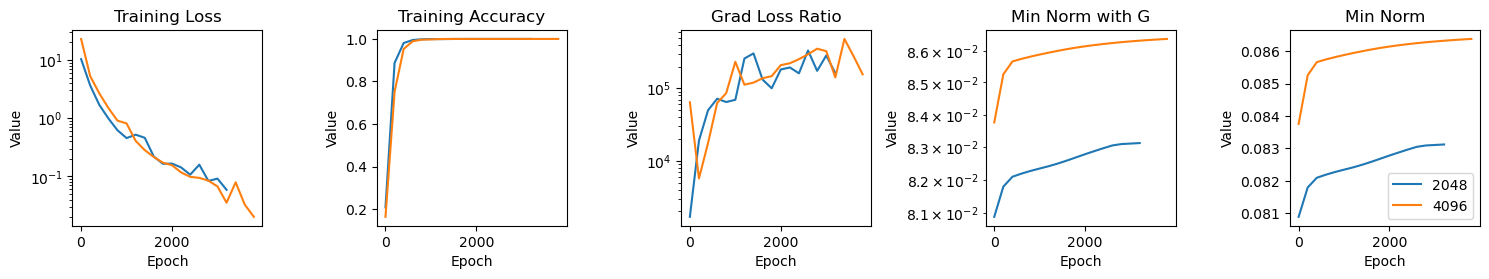

In [36]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.0001, "cifar", "sgd", 0, 512, 4000 
wn_width = 512
model_name = "weight_norm"
model_params = {}
model_params[512] = {"width": 512, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[1024] = {"width": 1024}
model_params[2048] = {"width": 2048, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
model_params[4096] = {"width": 4096, "init": "O(1/sqrt{m})", "var": 0.02, "scale": "1.0"}
"""
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)
"""
plot_figures_widths([2048, 4096], model_params)

In [ ]:
! python main.py --dataset cifar --model weight_norm --loss MSELoss --opt sgd --lr 0.01 --epoch 4000 --analysis loss weight_norm --batch_size 512 --width 4096 --init_mode "O(1)" -
-basis_var 5 --wn_scale 10

In [ ]:
! python main.py --dataset cifar --model weight_norm_torch --loss MSELoss --opt sgd --lr 0.01 --epoch 4000 --analysis loss weight_norm --batch_size 512 --width 512

results/cifar/sgd/weight_norm_torch/width_512/lr_0.01/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
[24.61222267150879, 164.87554931640625, 602.7796630859375, 700.350830078125, 895.3888549804688, 486.5162658691406, 1084.6285400390625, 1025.7464599609375, 836.203369140625, 1453.425537109375, 1207.873779296875, 606.736083984375, 1104.340576171875, 1749.410400390625, 1576.0799560546875, 1260.8714599609375, 1185.482177734375, 1107.498291015625, 1229.7034912109375, 1674.141357421875]
results/cifar/sgd/weight_norm_torch/width_1024/lr_0.01/wd_0/batch_size_512/epoch_4000/
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2401, 2601, 2801, 3001, 3201, 3401, 3601, 3801]
[30.247909545898438, 316.931640625, 523.7084350585938, 300.5067138671875, 353.5718688964844, 1261.9029541015625, 1257.0274658203125, 2179.69482421875, 2112.18408203125, 1858.9320068359375, 2270.66455078125, 833.6176

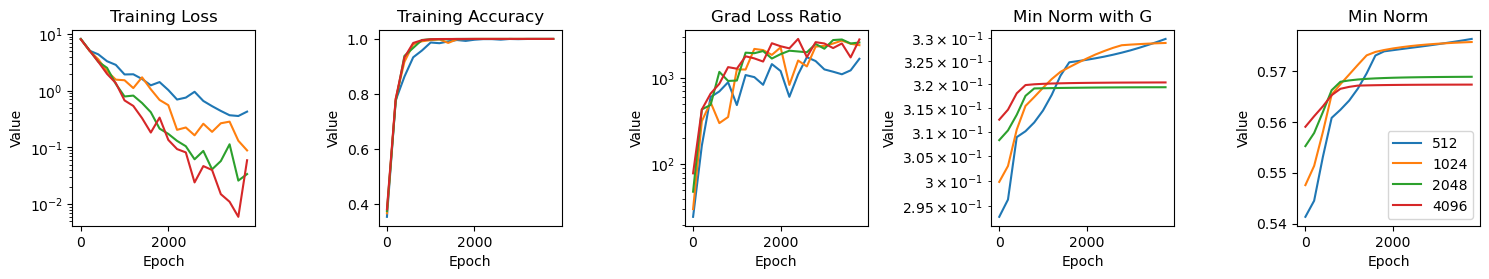

In [25]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 4000 
wn_width = 512
model_name = "weight_norm_torch"
model_params = {}
model_params[512] = {"width": 512}
model_params[1024] = {"width": 1024}
model_params[2048] = {"width": 2048}
model_params[4096] = {"width": 4096}
"""
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)
"""
plot_figures_widths([512, 1024, 2048, 4096], model_params)

results/cifar/sgd/weight_norm_torch/width_512/lr_0.01/wd_0/batch_size_512/epoch_40000/
[1, 201, 401, 601, 801, 1001, 1201]
[3.942337989807129, 8.823382377624512, 13.393776893615723, 15.697613716125488, 15.049610137939453, 16.411367416381836, 17.871889114379883]


AttributeError: 'graphs' object has no attribute 'wn_norm_min_with_g'

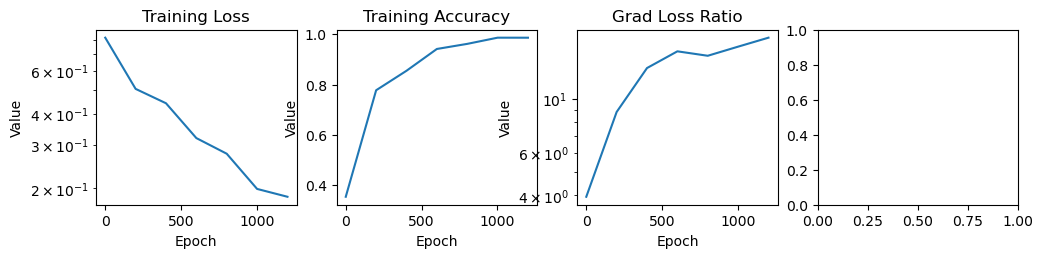

In [19]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 512
model_name = "weight_norm_torch"
model_params = {}
model_params[512] = {"width": 512}
model_params[1024] = {"width": 1024}
"""
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)
"""
plot_figures_widths([512, 1024], model_params)

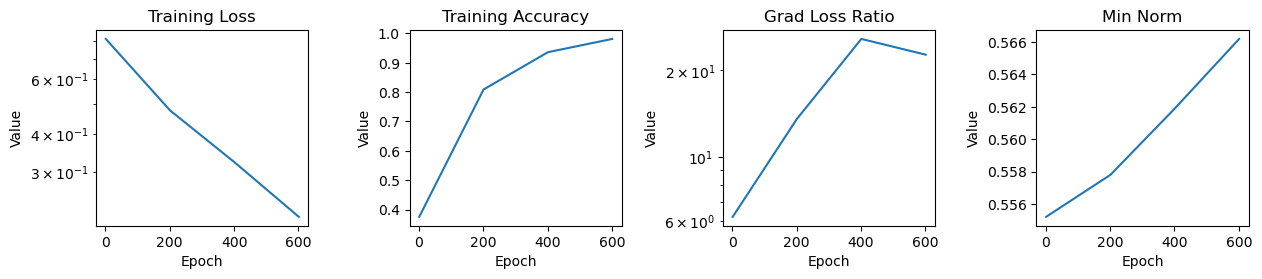

In [44]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 2048
model_name = "weight_norm_torch"
model_params = {"width": wn_width}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)

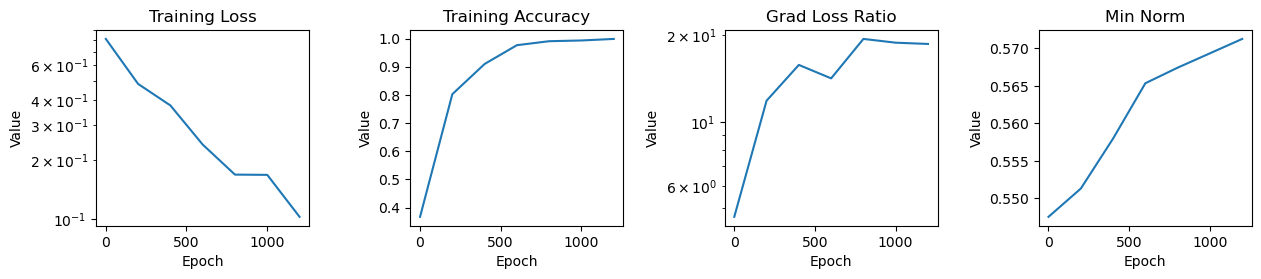

In [43]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 1024
model_name = "weight_norm_torch"
model_params = {"width": wn_width}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)

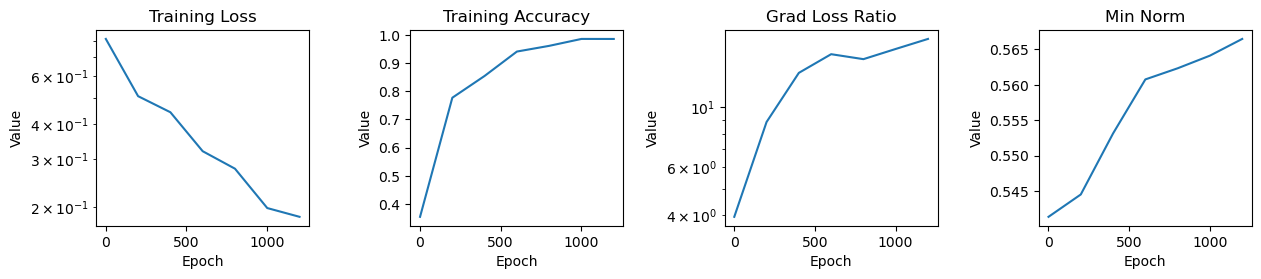

In [41]:
lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
wn_width = 512
model_name = "weight_norm_torch"
model_params = {"width": wn_width}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)

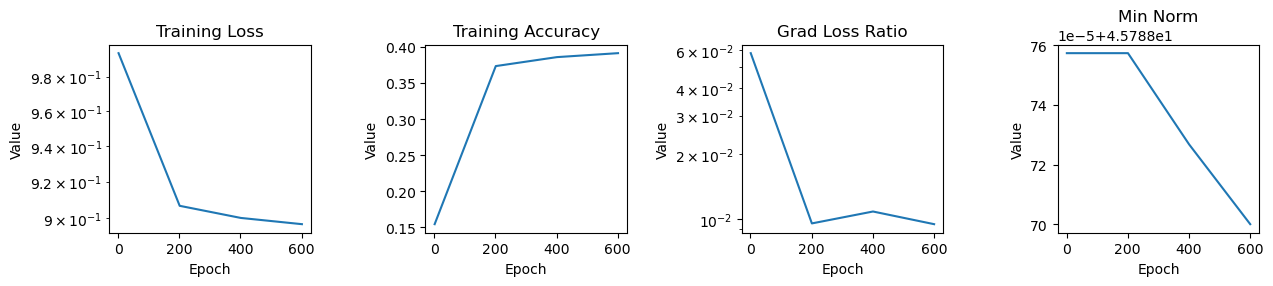

In [36]:
wn_width            = 512 #1024, 2048
wn_init_mode        = "O(1)"#"O(1/sqrt{m})"
wn_basis_var        = 5
wn_scale            = 10

lr, dataset_name, opt_name, weight_decay, batch_size, epochs = 0.01, "cifar", "sgd", 0, 512, 40000 
model_name = "weight_norm"
model_params = {"width": wn_width, "init": wn_init_mode, "var": wn_basis_var, "scale": wn_scale}
directory = get_directory(lr, model_name, weight_decay, batch_size, epochs, **model_params)

with open(f'../{directory}train_graphs.pk', 'rb') as f:
    train_graphs = pickle.load(f)

plot_figures(train_graphs, lr)
